# Consigna

Cada estudiante deberá instalar Jupyter Notebook en su computadora para realizar la siguiente actividad y generar el archivo entregable:

1. Buscar en la web un Dataset que pueda ser utilizado para hacer Clasificación o Regresión.
2. En Jupyter Notebook, cargar el Dataset elegido y analizarlo. Esto implica: 
    a. Imprimir algunos ejemplos con sus Features (por ejemplo, los primeros 10 ejemplos), 
    b. Describir los Features que contiene (tipo de variable, si son números definir valor máximo y mínimo, si son categóricos, nombrar las categorías que tiene)
    c. Decidir si algún Feature puede ser usado como Label.
3. Describir un problema en donde pueda utilizarse este Dataset para que, usando Machine Learning, se pueda encontrar una solución para resolverlo. En caso de que ningún Feature sirva como Label al problema planteado, explicar brevemente (en texto, no código) cómo se podría crear dicho Label.

# 1. Descargamos un dataset para hacer clasificación binaria

In [1]:
# En https://www.kaggle.com/settings descargar un nuevo token, guardarlo en ~/.kaggle/kaggle.json
# Kaggle Dataset: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud
!kaggle datasets download dhanushnarayananr/credit-card-fraud
!unzip credit-card-fraud.zip

 97%|████████████████████████████████████▊ | 28.0M/28.9M [00:01<00:00, 34.0MB/s]
100%|██████████████████████████████████████| 28.9M/28.9M [00:01<00:00, 19.6MB/s]
Archive:  credit-card-fraud.zip
  inflating: card_transdata.csv      


# 2. Cargamos el dataset y lo analizamos

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('card_transdata.csv')

## 2.a Imprimir algunos ejemplos con sus Features (por ejemplo, los primeros 10 ejemplos)

In [4]:
df[:10]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,1.0,0.0,0.0,0.0,0.0
6,3.724019,0.956838,0.278465,1.0,0.0,0.0,1.0,0.0
7,4.848247,0.320735,1.273050,1.0,0.0,1.0,0.0,0.0
8,0.876632,2.503609,1.516999,0.0,0.0,0.0,0.0,0.0
9,8.839047,2.970512,2.361683,1.0,0.0,0.0,1.0,0.0


# 2.b Describir los Features que contiene (tipo de variable, si son números definir valor máximo y mínimo, si son categóricos, nombrar las categorías que tiene)

Analizamos las columnas del dataset. Del paso 2.a ya podemos ver que tipo de datos tiene cada feature:
- distance_from_home: Número real
- distance_from_last_transaction: Número real
- ratio_to_last_transaction: Número real
- repeat_retailer: Categórico (0, 1)
- used_chip: Categórico (0, 1)
- user_pin_number: Categórico (0, 1)
- online_order: Categórico (0, 1)
- fraud: Categórico (0, 1) 

Ahora utilizando pandas, imprimimos cantidades, máximos, mínimos, promedios, etc.

In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [7]:
df.isnull().values.any()

False

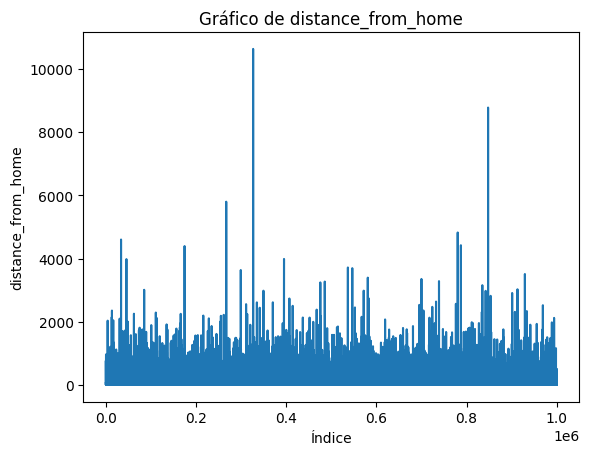

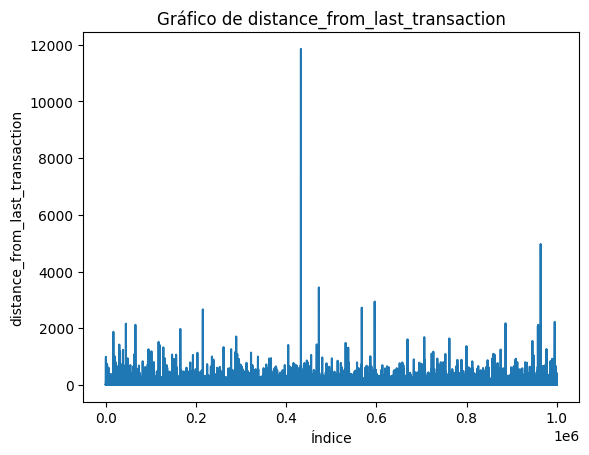

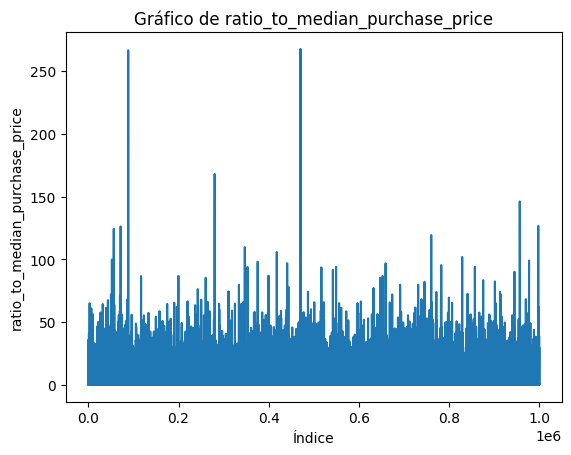

In [8]:
for col in ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]:
    plt.figure()
    df[col].plot()
    plt.title("Gráfico de " + col)
    plt.xlabel("Índice")
    plt.ylabel(col)
    plt.show()

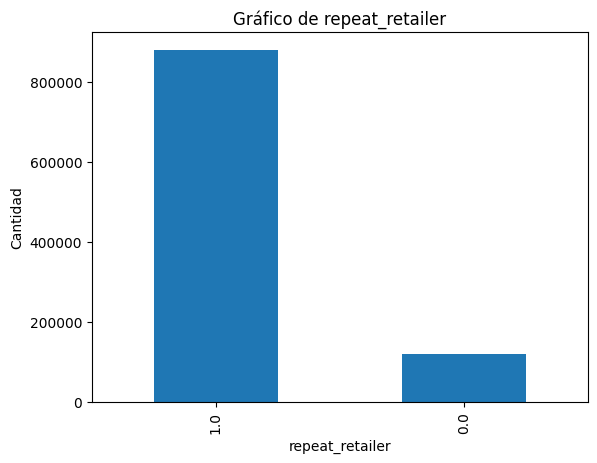

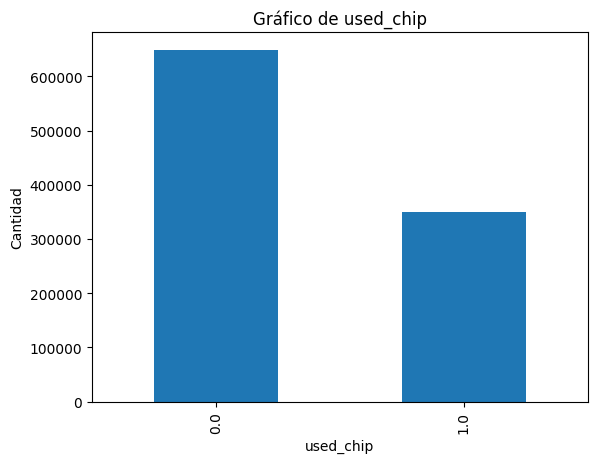

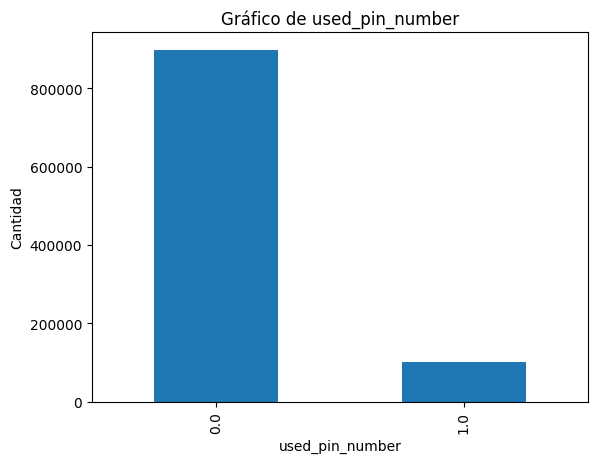

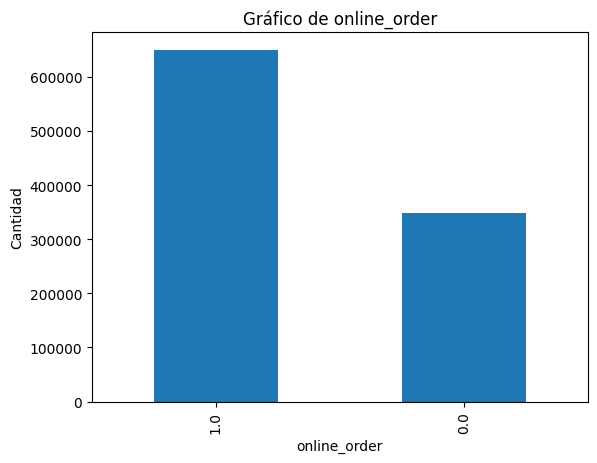

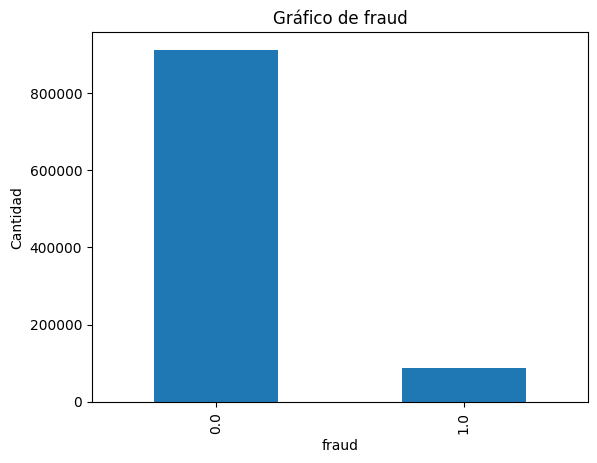

In [9]:
for col in ["repeat_retailer", "used_chip", "used_pin_number", "online_order", "fraud"]:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title("Gráfico de " + col)
    plt.xlabel(col)
    plt.ylabel("Cantidad")
    plt.show()

# 2.c Decidir si algún Feature puede ser usado como Label.

El feature "fraud" es el que se puede usar como label. Es una variable categórica que indica si la transacción fue fraudulenta o no.

# 3. Describir un problema en donde pueda utilizarse este Dataset para que, usando Machine Learning, se pueda encontrar una solución para resolverlo.

El problema que se puede plantear es el de clasificar si una transacción es fraudulenta o no. Se puede utilizar un algoritmo de clasificación binaria para resolverlo.